In [ ]:

# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.1 MB/s eta 0:00:00


In [ ]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


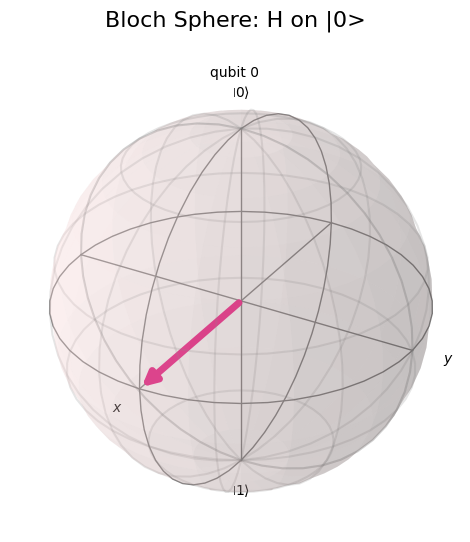

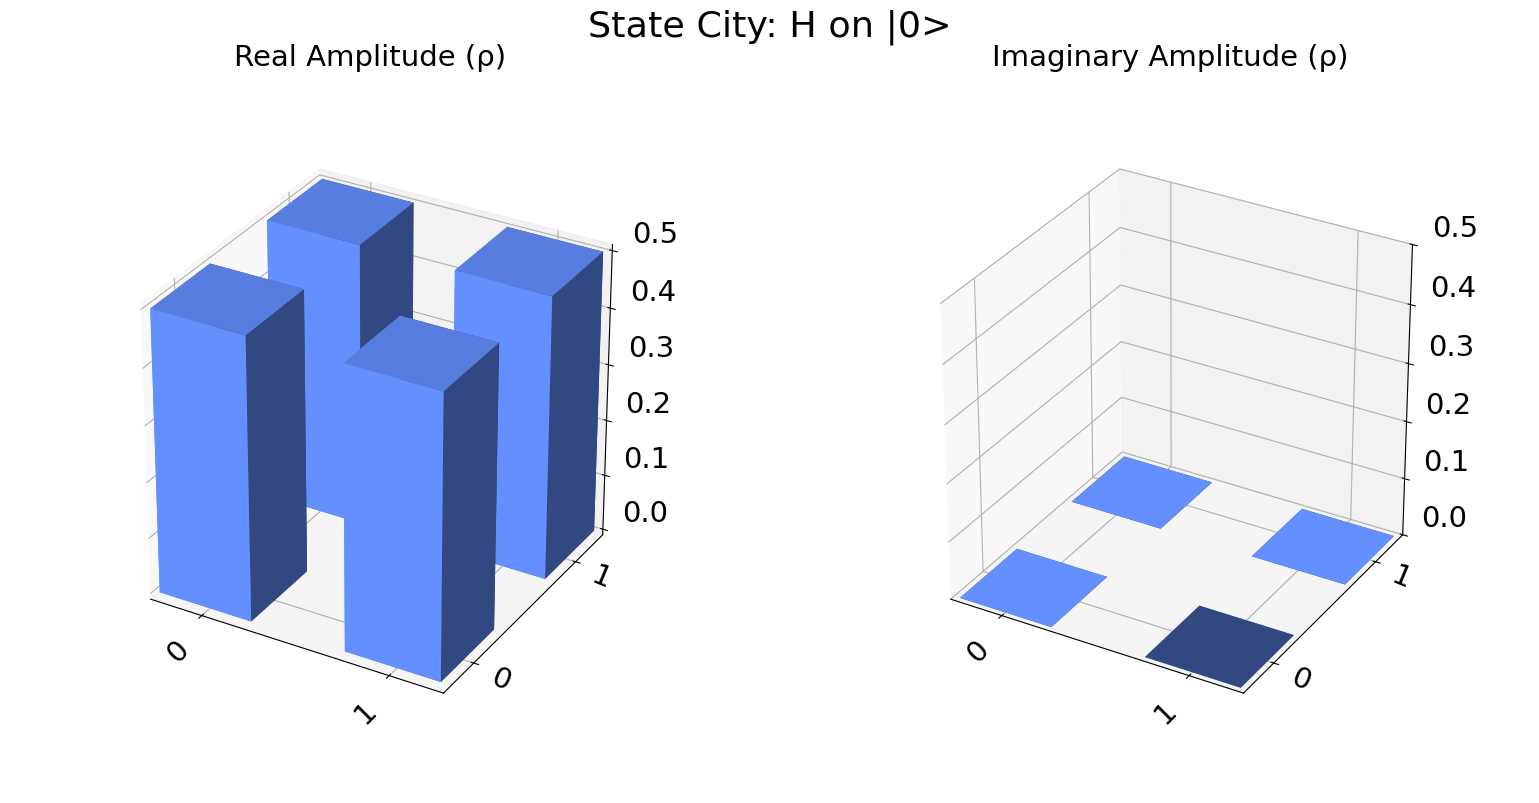

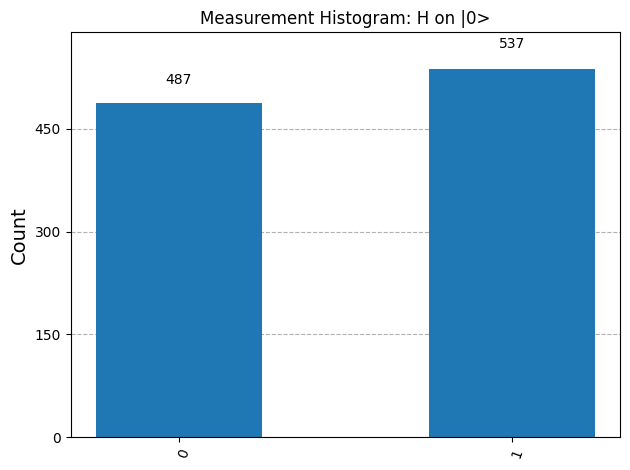



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


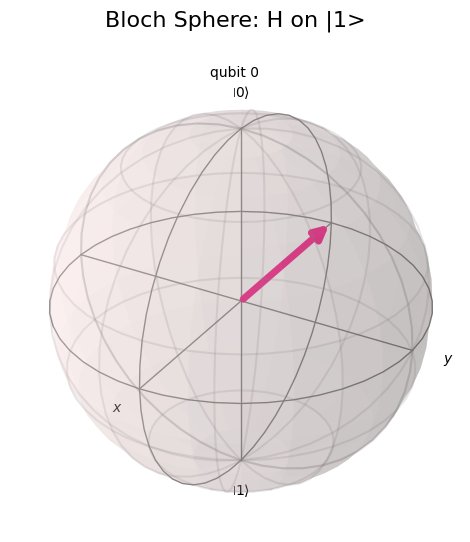

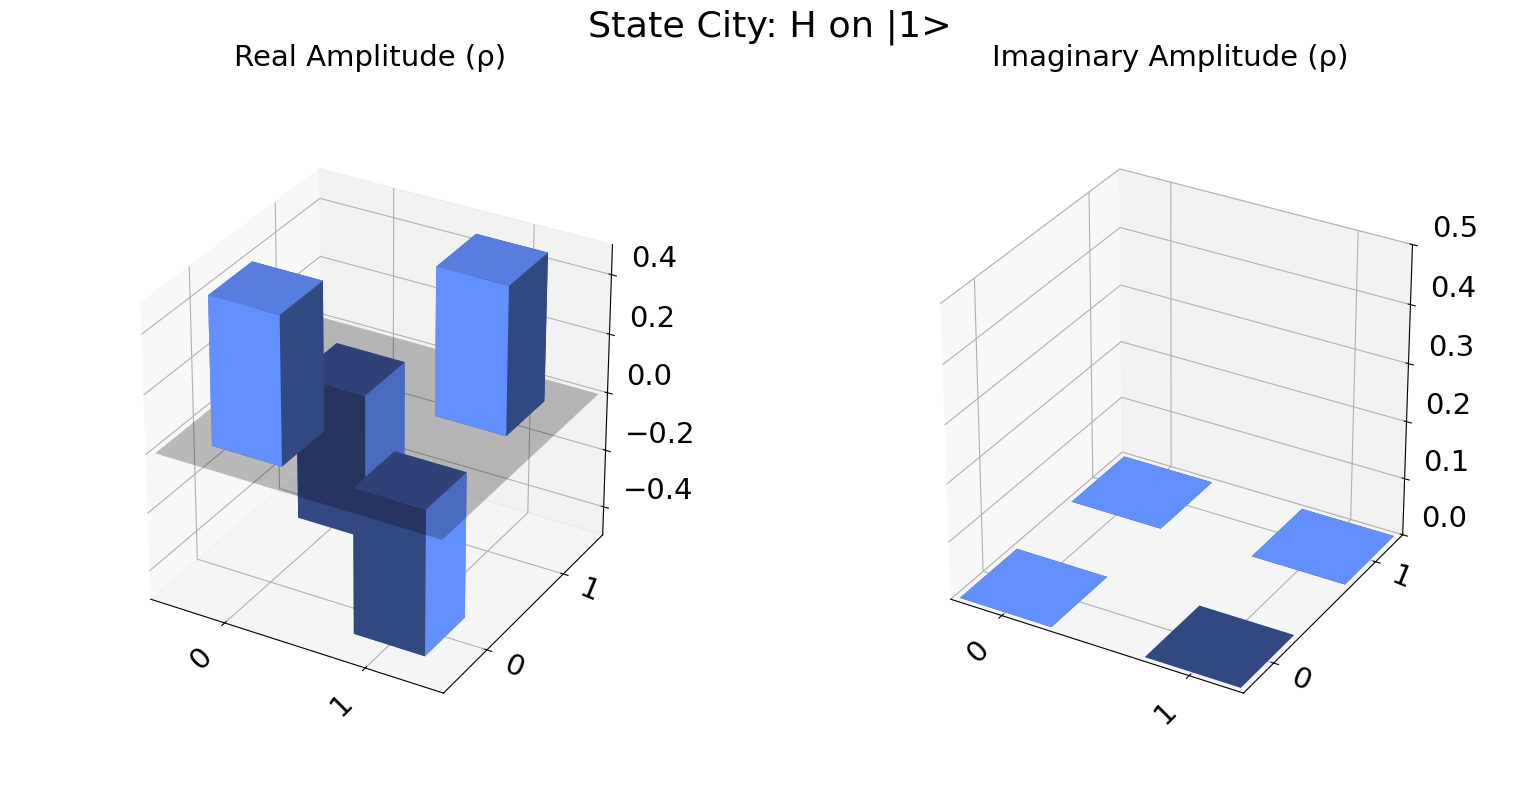

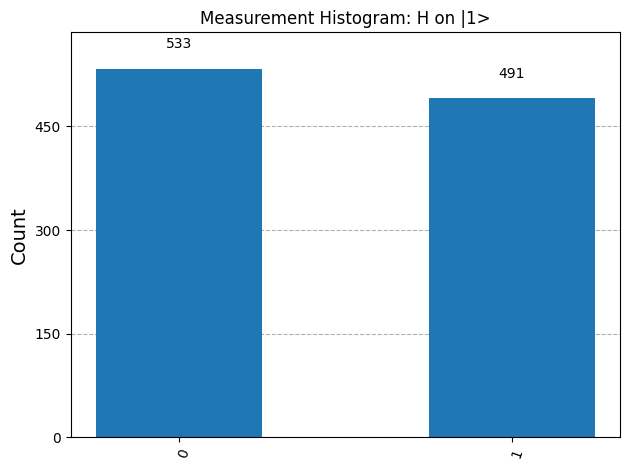



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


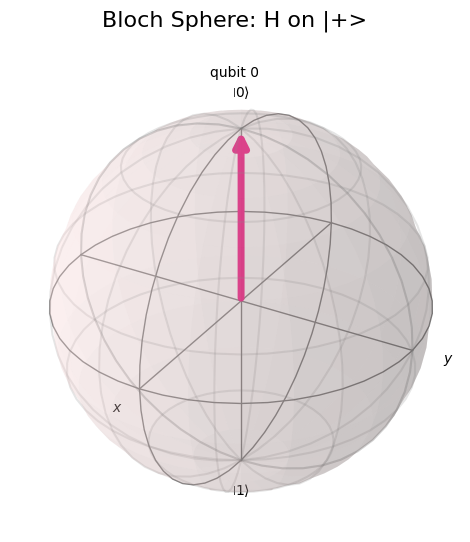

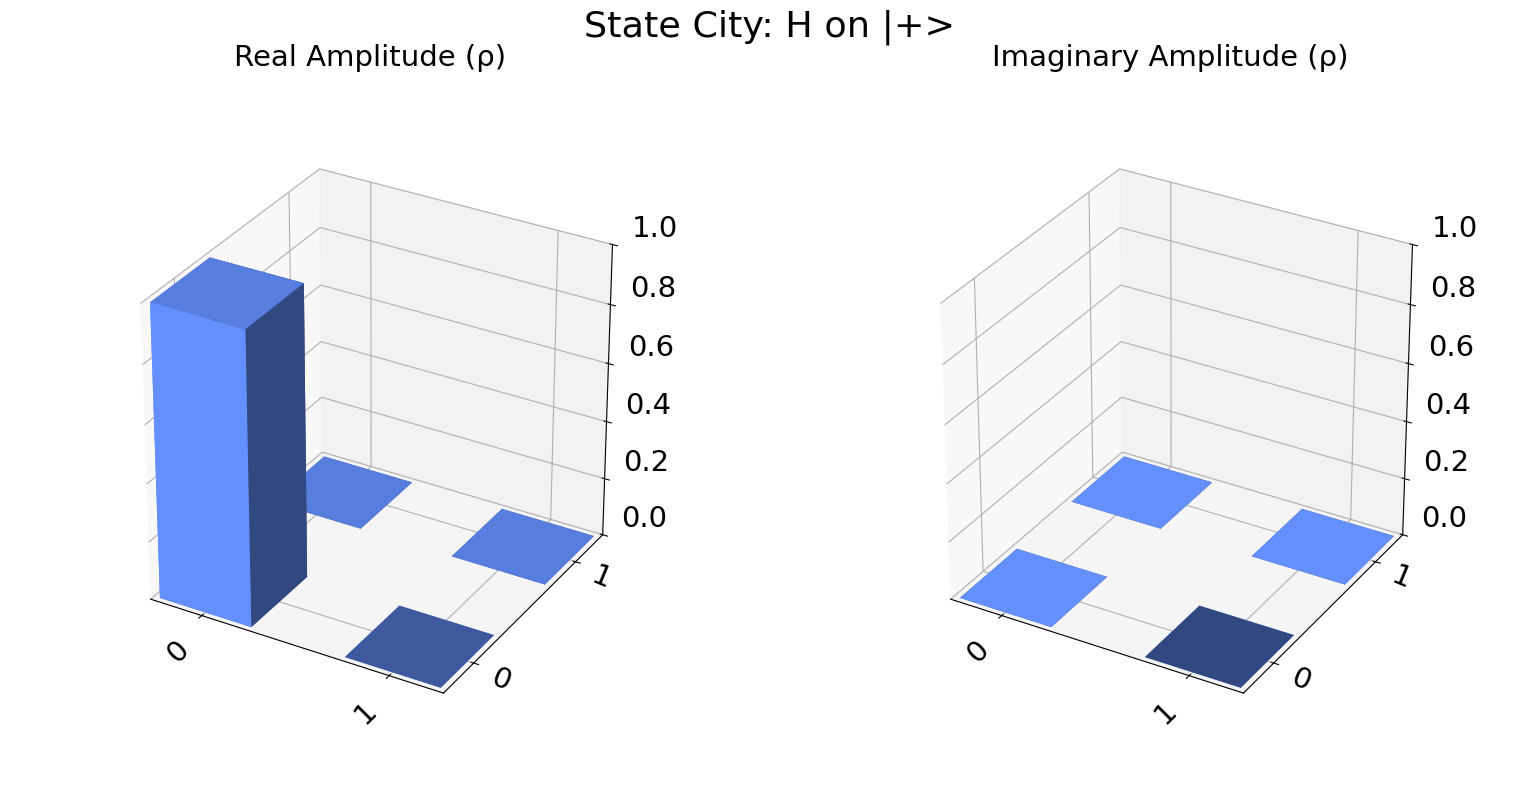

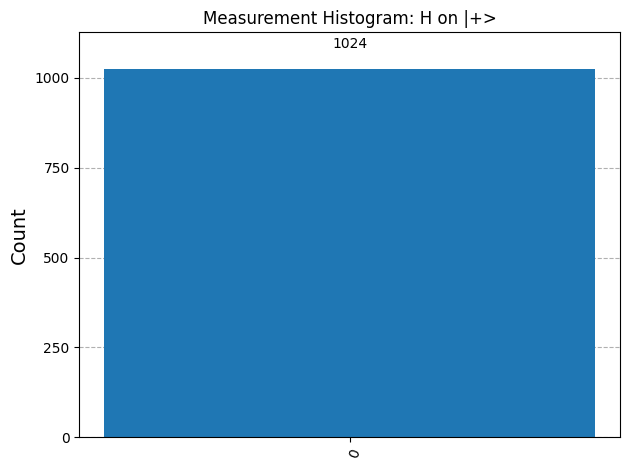



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


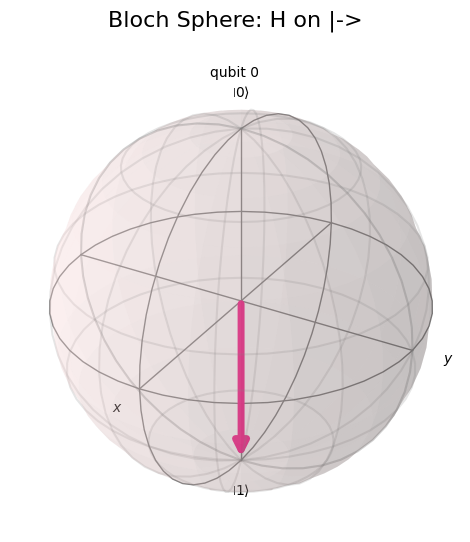

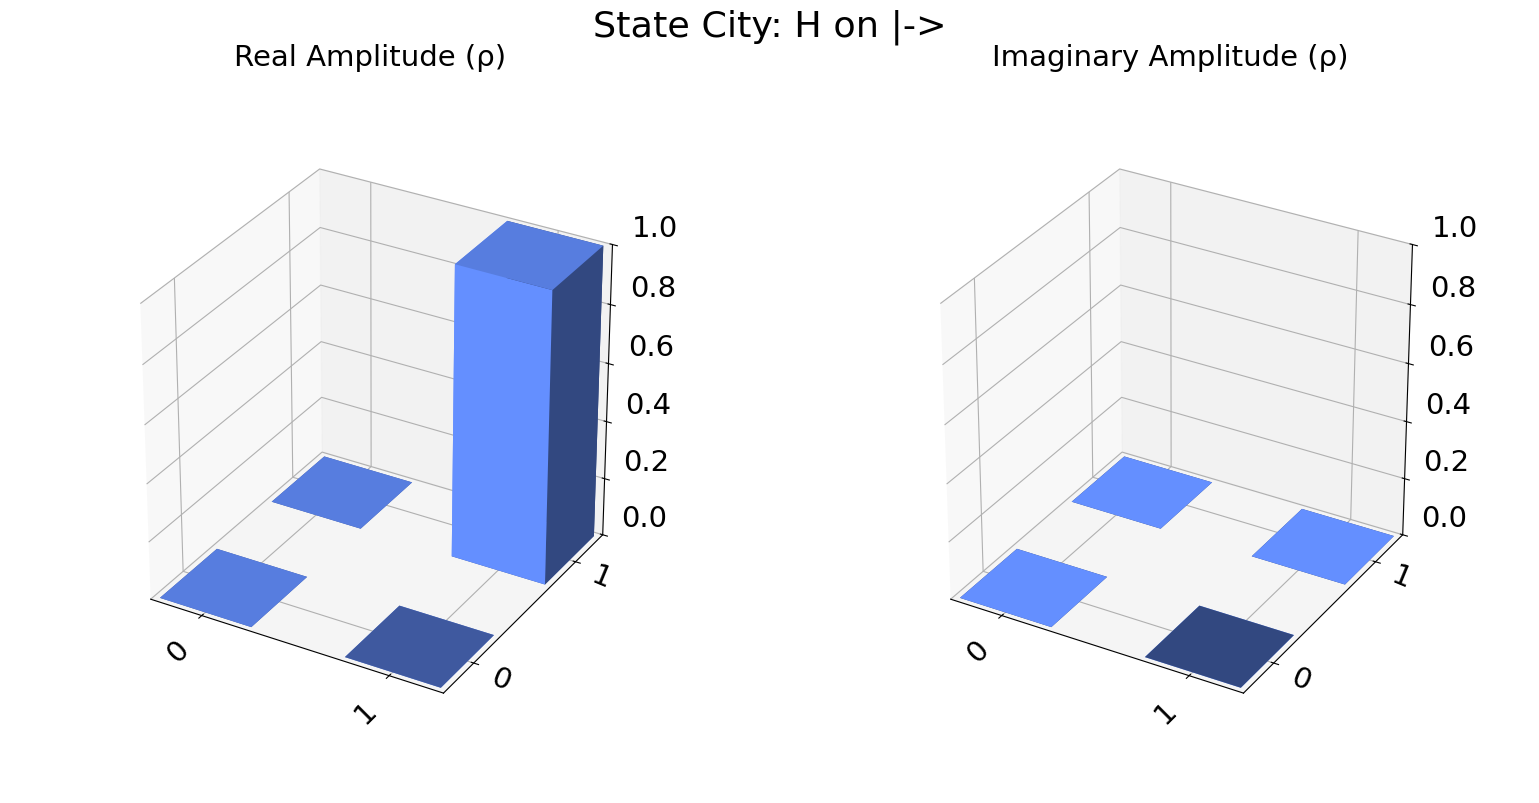

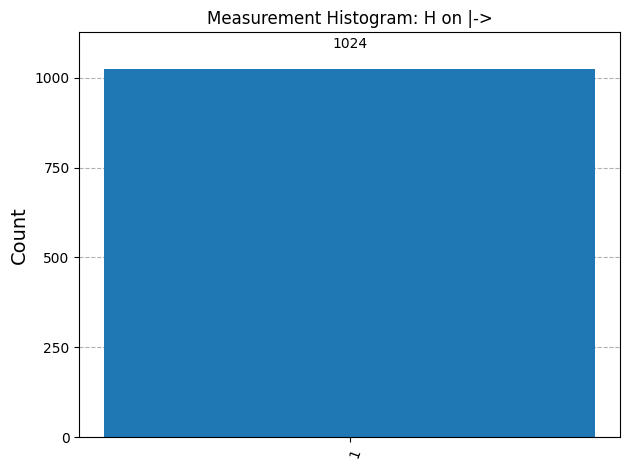

In [ ]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


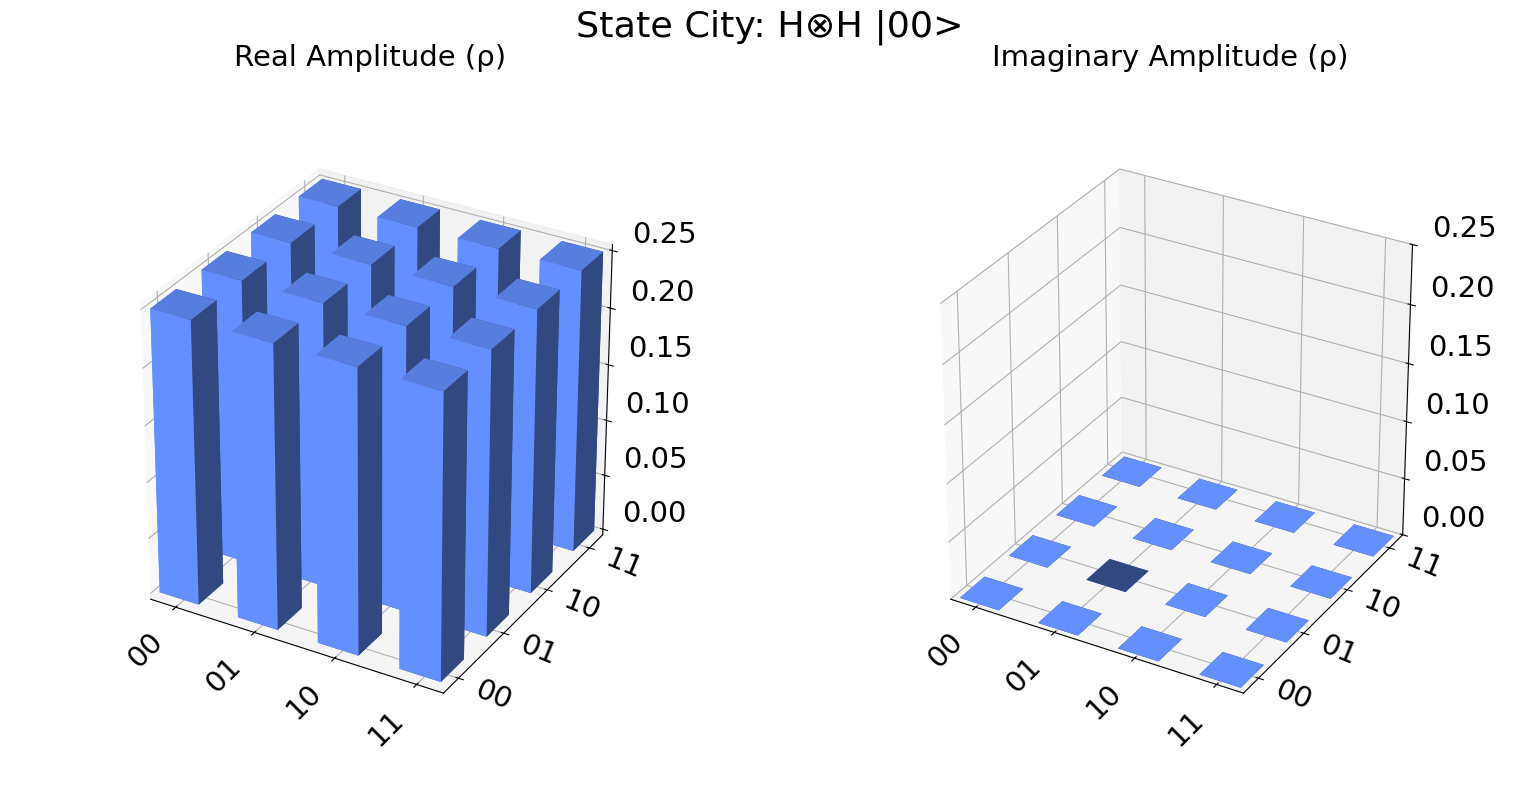

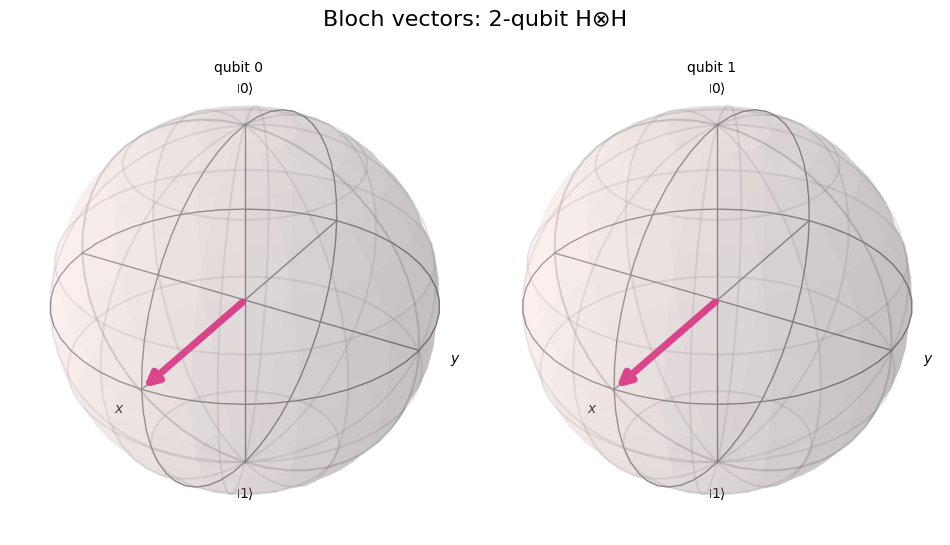

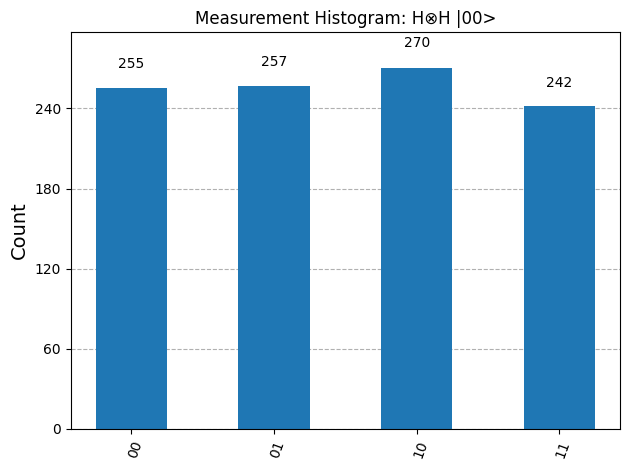


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [ ]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")

--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


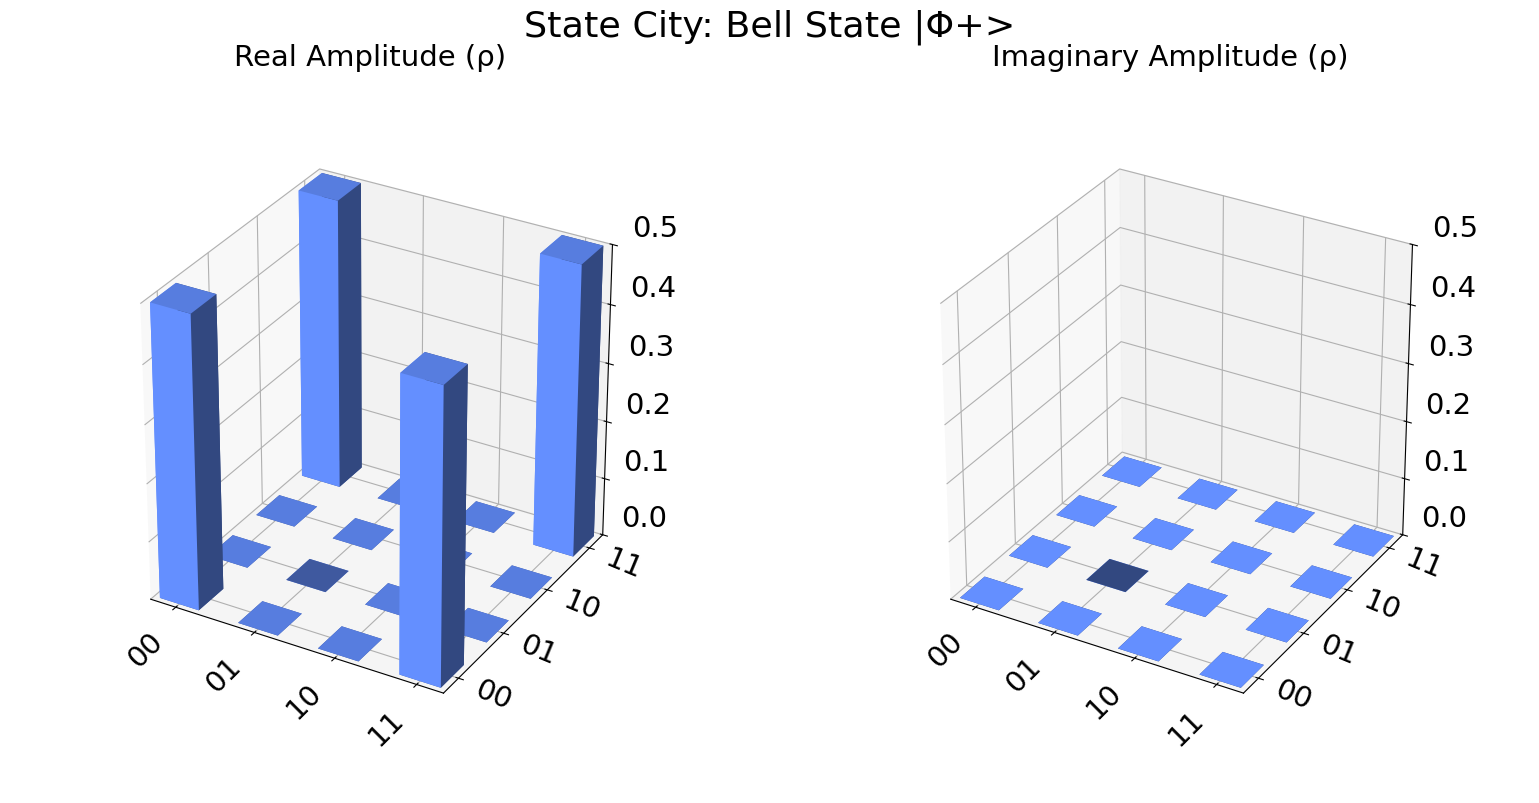

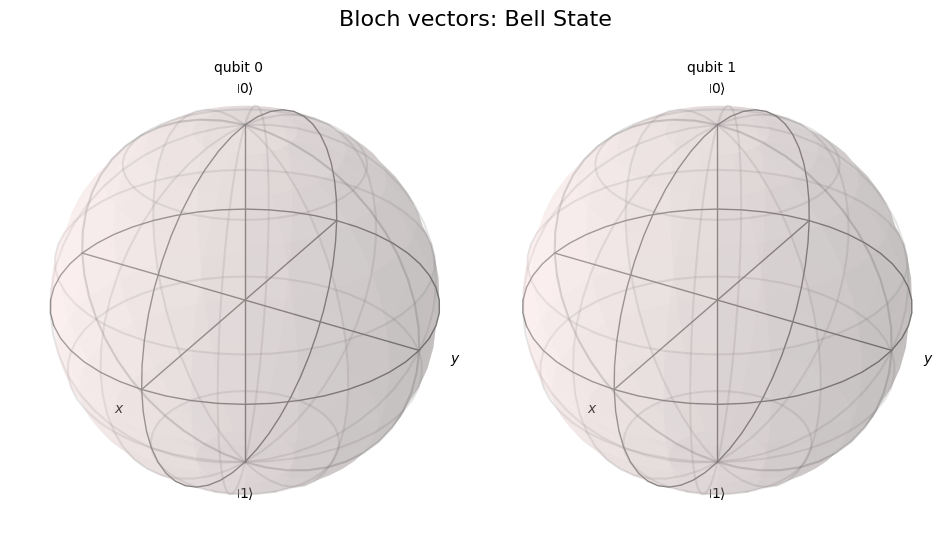

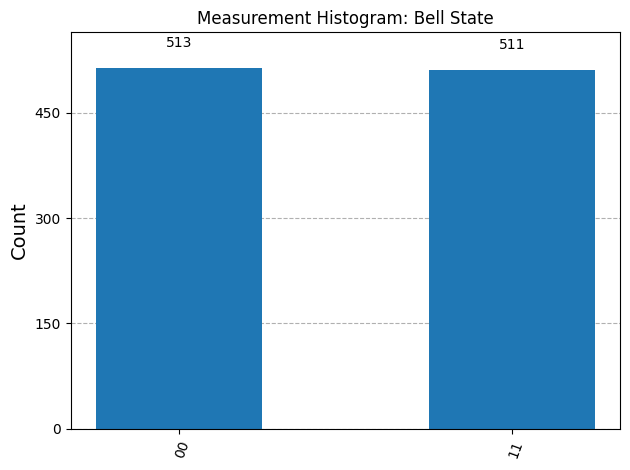


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [ ]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


--- H on |0> ---
Statevector (amplitudes): [0.707107+0.j 0.707107+0.j]


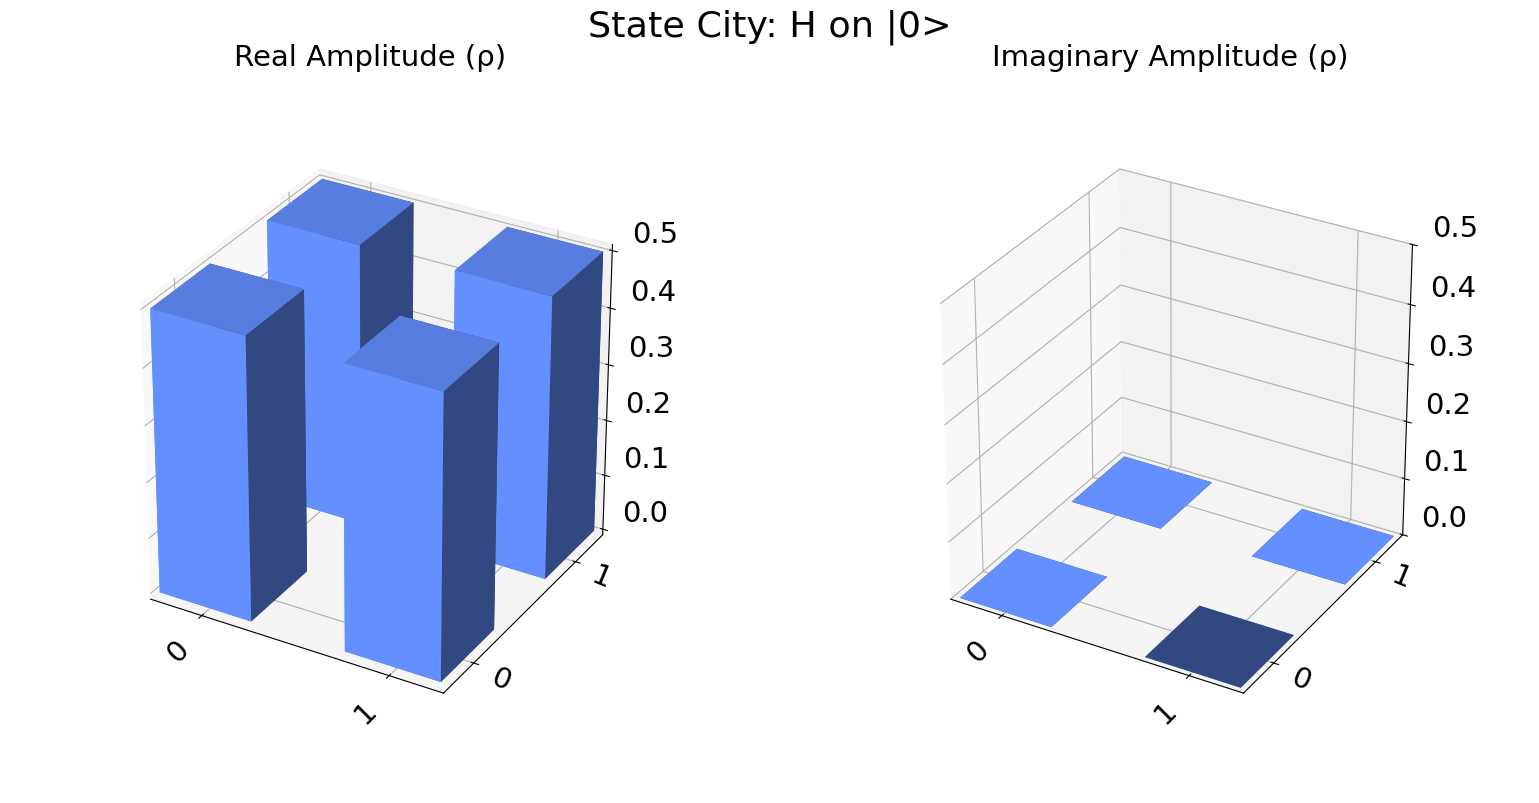

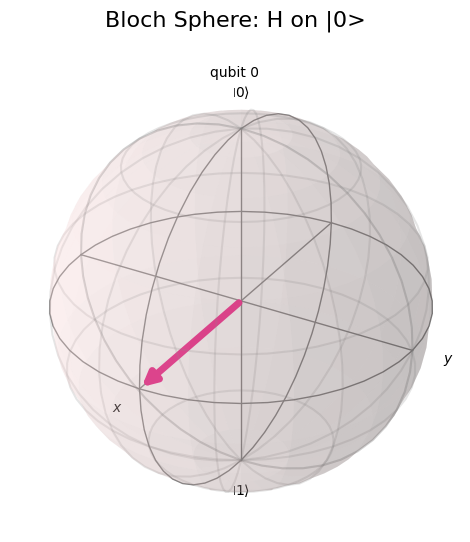

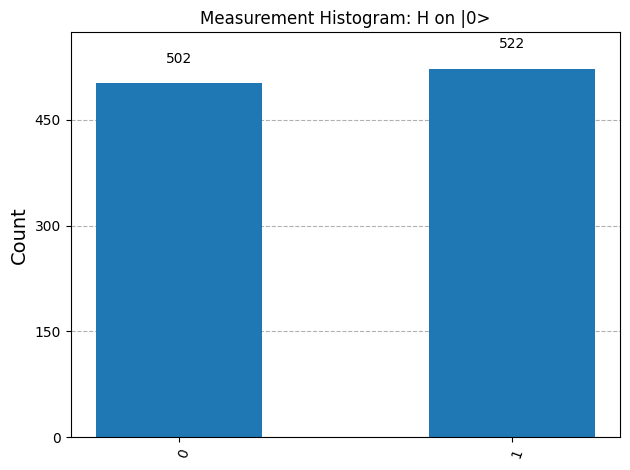

Counts: {'0': 502, '1': 522} 

--- H on |1> ---
Statevector (amplitudes): [ 0.707107+0.j -0.707107+0.j]


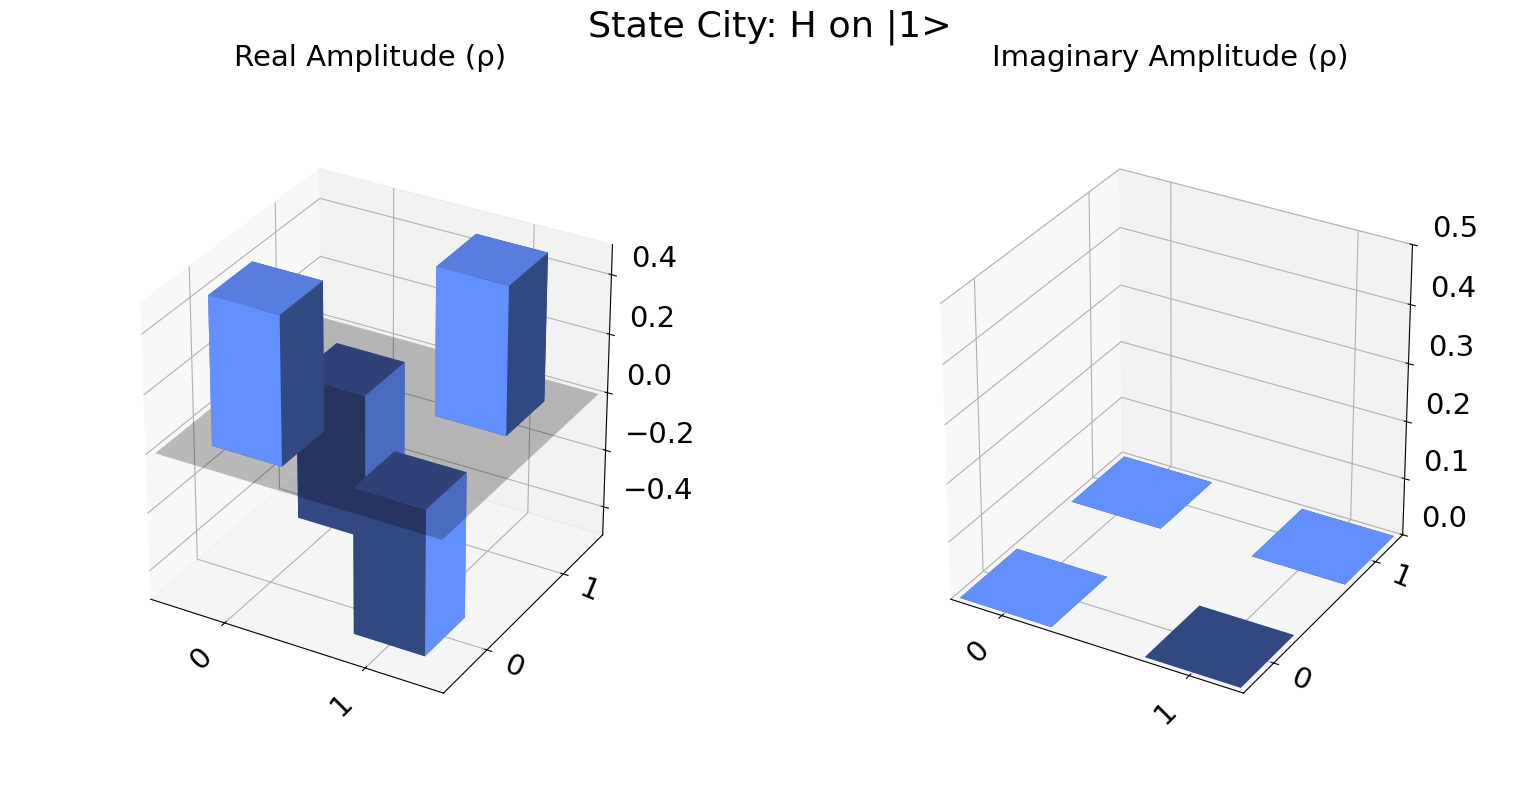

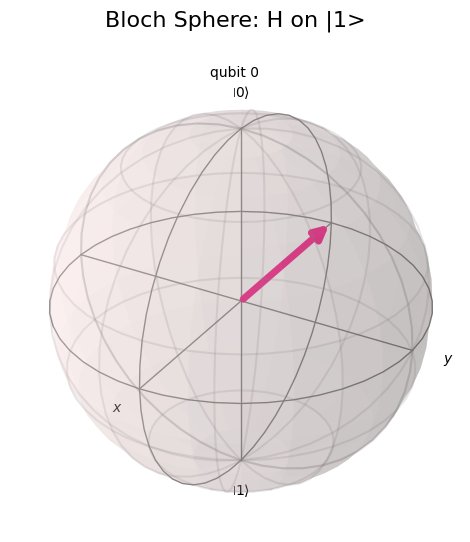

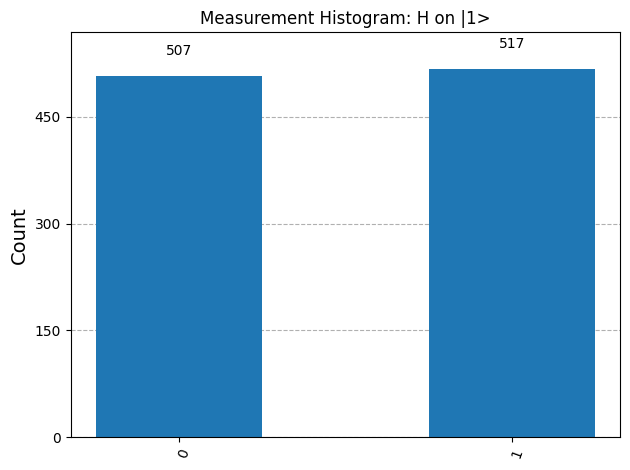

Counts: {'0': 507, '1': 517} 

--- H on |+> ---
Statevector (amplitudes): [1.+0.j 0.+0.j]


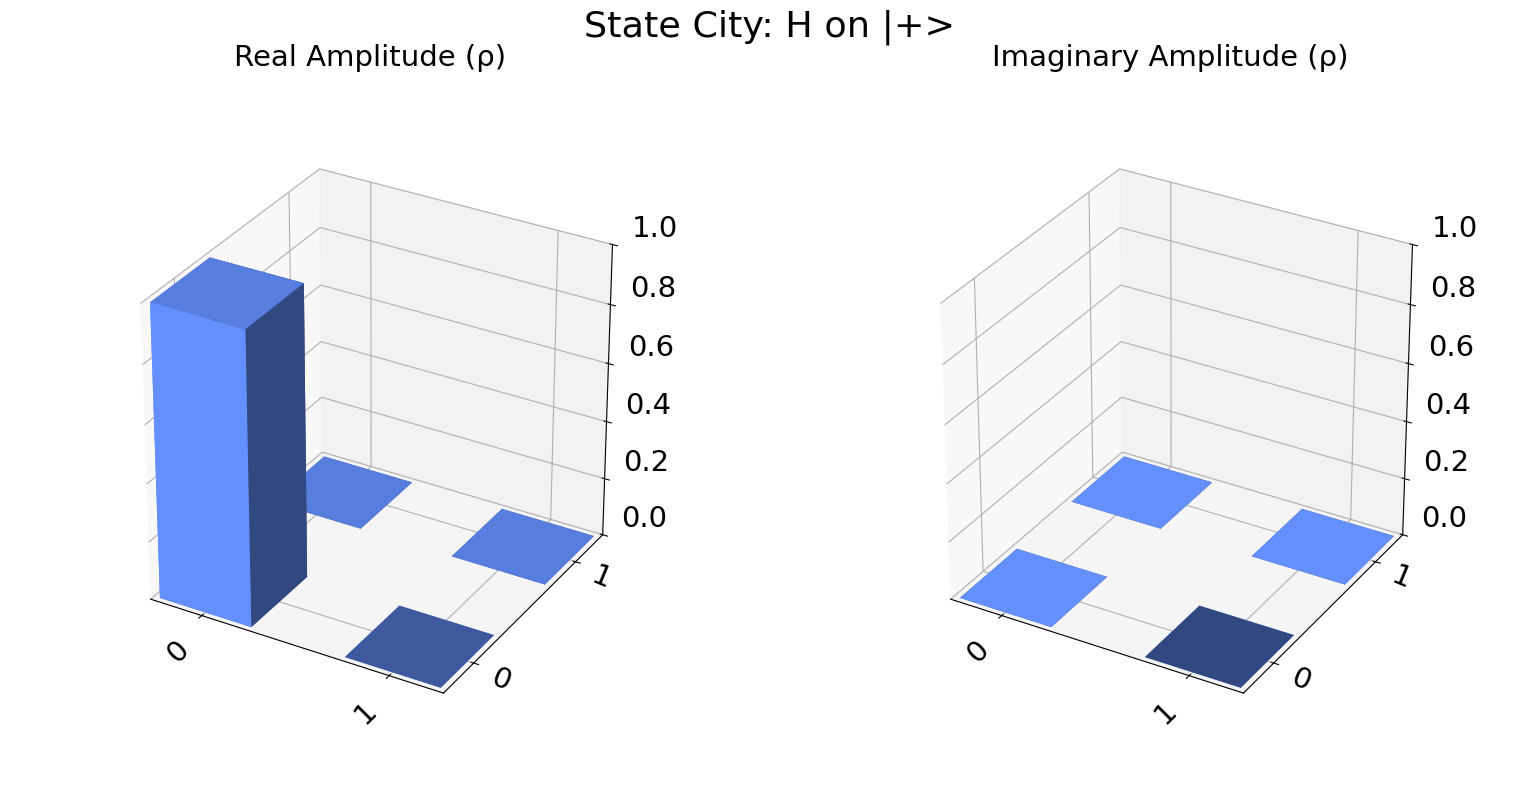

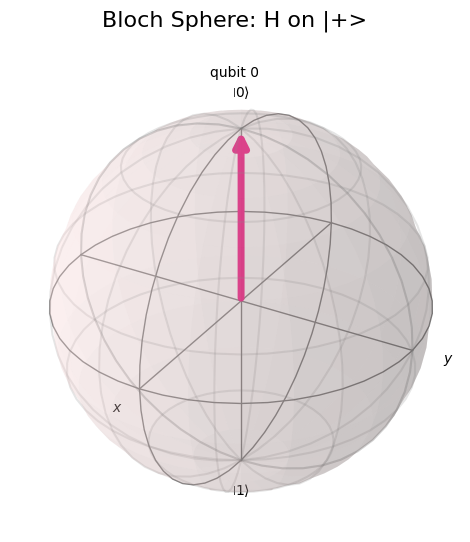

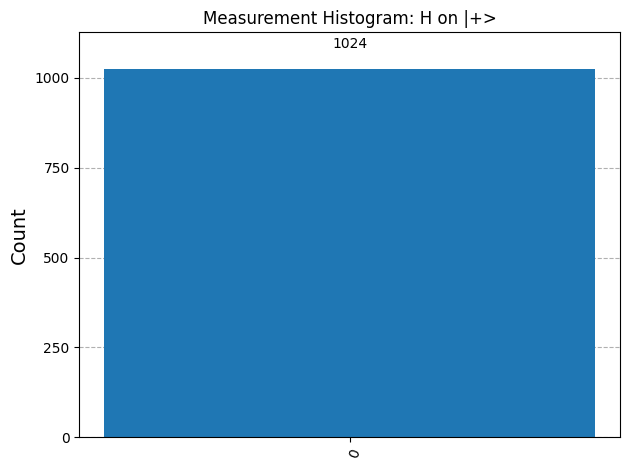

Counts: {'0': 1024} 

--- H on |-> ---
Statevector (amplitudes): [0.+0.j 1.+0.j]


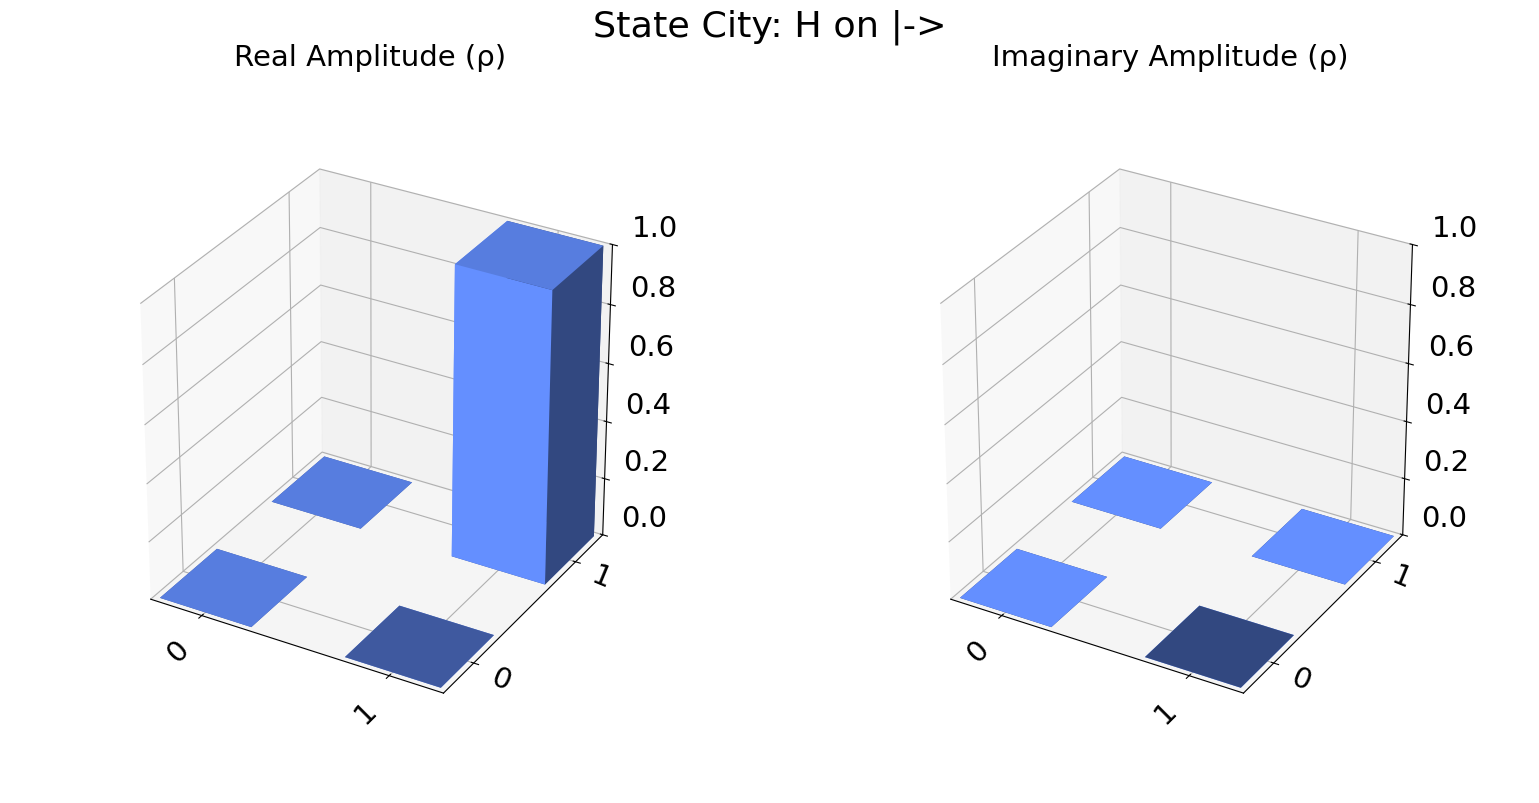

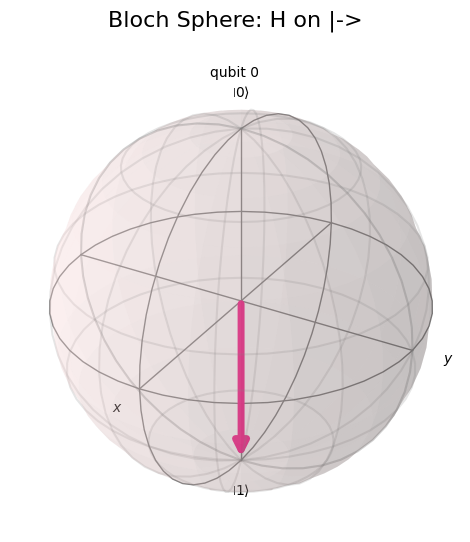

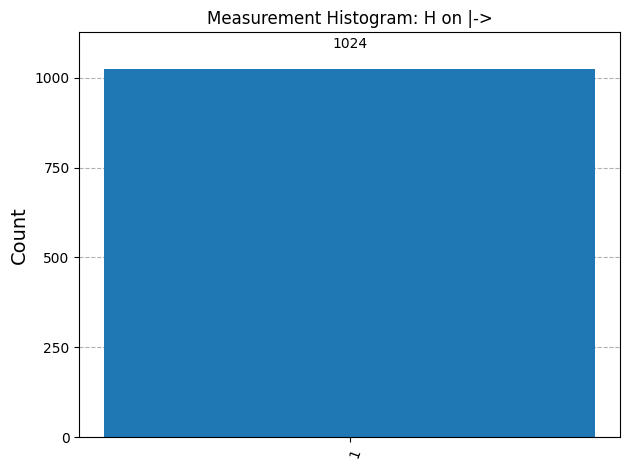

Counts: {'1': 1024} 



In [ ]:
# Task 1: H on |0>, |1>, |+>, |-> — predict and verify
def show_h_on_state(state_vec, label):
    # build circuit that initializes and applies H
    qc_state = QuantumCircuit(1)
    qc_state.initialize(state_vec, 0)
    qc_state.h(0)

    # get resulting statevector
    sv = Statevector.from_instruction(qc_state)
    print(f"--- H on {label} ---")
    print("Statevector (amplitudes):", np.round(sv.data, 6))

    # plots
    display(plot_state_city(sv, title=f"State City: H on {label}"))
    display(plot_bloch_multivector(sv, title=f"Bloch Sphere: H on {label}"))

    # measurement histogram simulation
    qc_meas = QuantumCircuit(1, 1)
    qc_meas.initialize(state_vec, 0)
    qc_meas.h(0)
    qc_meas.measure(0, 0)
    t_qc = transpile(qc_meas, sim)
    result = sim.run(t_qc, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("Counts:", counts, "\n")

# define states
zero = np.array([1, 0])
one  = np.array([0, 1])
plus = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
minus= np.array([1/np.sqrt(2), -1/np.sqrt(2)])

# run
show_h_on_state(zero, "|0>")
show_h_on_state(one,  "|1>")
show_h_on_state(plus,"|+>")
show_h_on_state(minus,"|->")




--- 3-qubit H⊗H⊗H on |000> ---
Statevector amplitudes (length 8):
[0.353553+0.j 0.353553+0.j 0.353553+0.j 0.353553+0.j 0.353553+0.j
 0.353553+0.j 0.353553+0.j 0.353553+0.j]


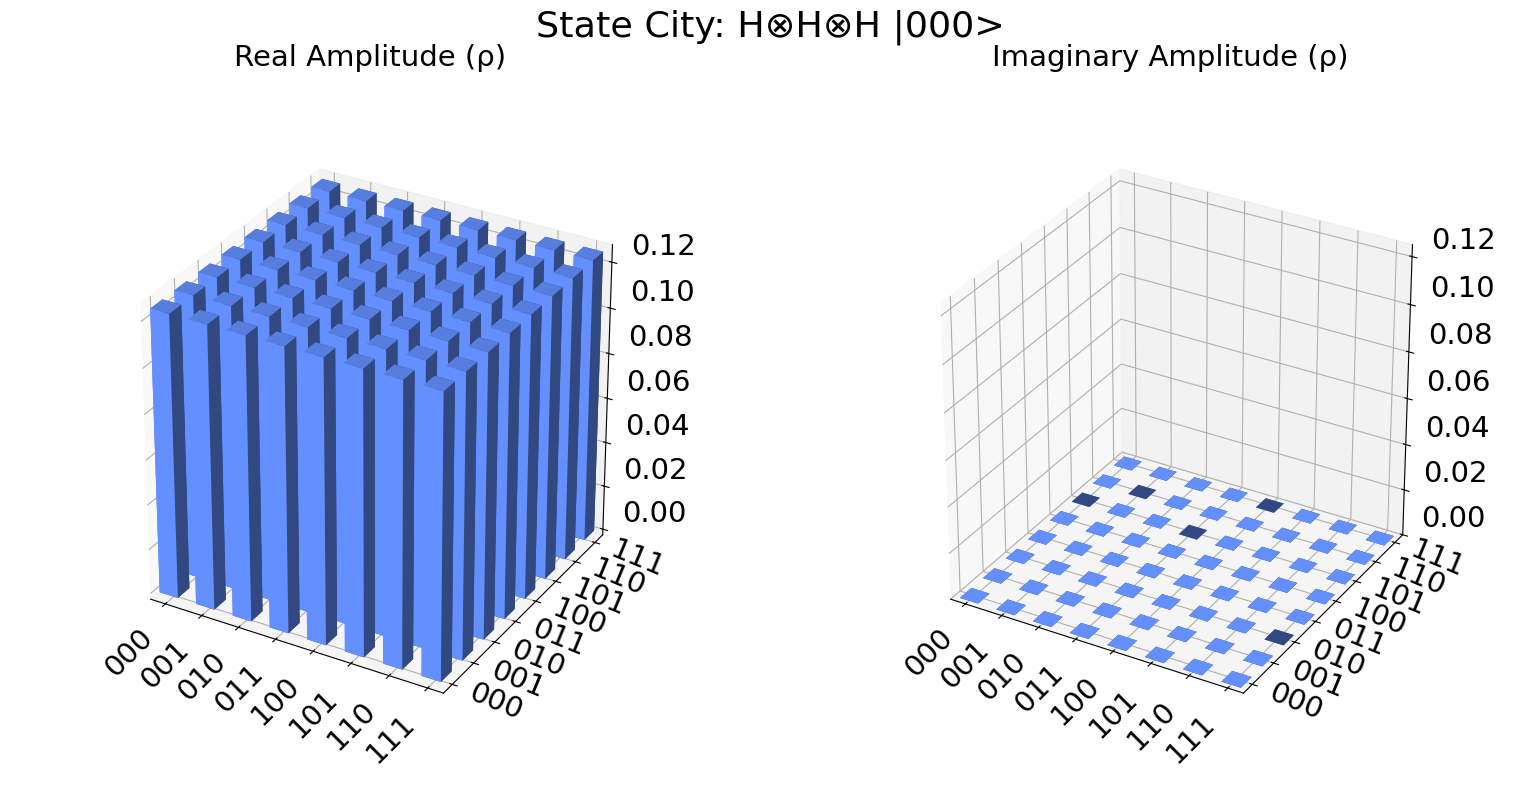

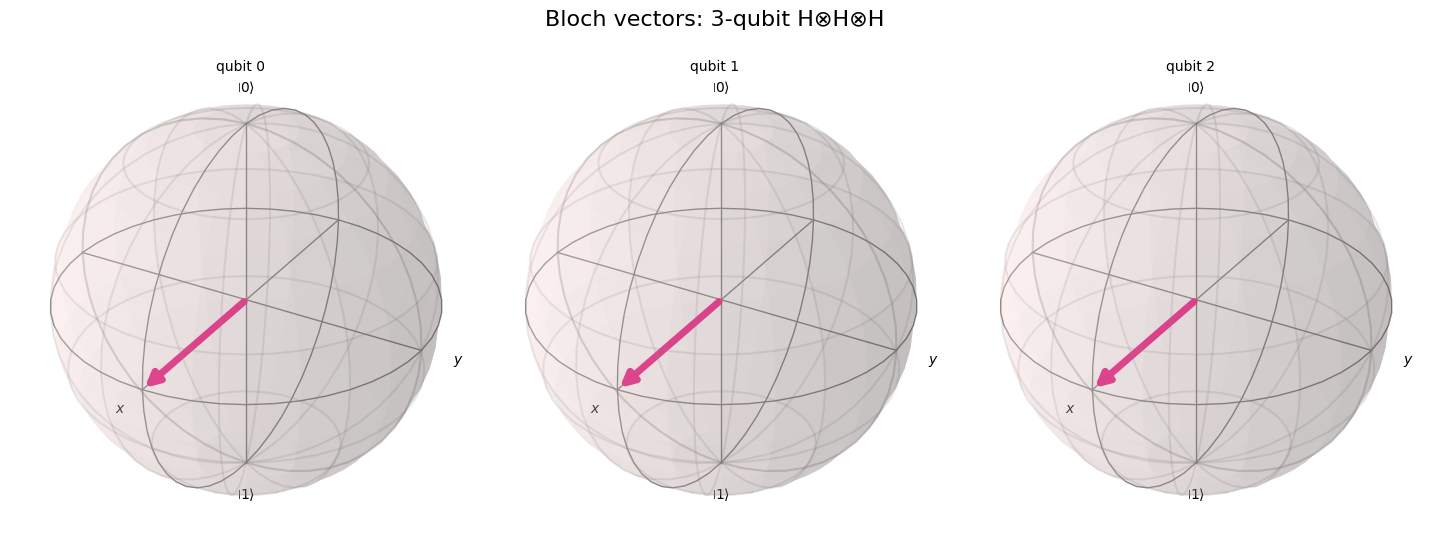

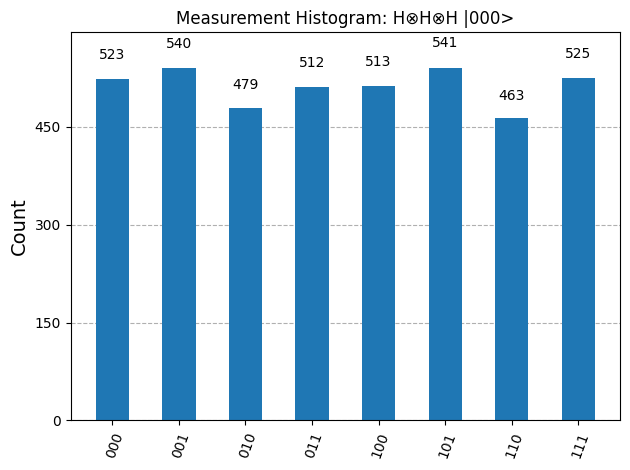

Counts (example): {'001': 540, '101': 541, '100': 513, '110': 463, '111': 525, '011': 512, '000': 523, '010': 479}

Analytical: all 8 basis states should appear ~1/8 each.



In [ ]:
# Task 2: 3-qubit H⊗H⊗H on |000>
qc3 = QuantumCircuit(3, 3)
qc3.h([0,1,2])
qc3.measure([0,1,2], [0,1,2])

# Statevector (before measurement)
qc3_state = QuantumCircuit(3)
qc3_state.h([0,1,2])
sv3 = Statevector.from_instruction(qc3_state)

print("--- 3-qubit H⊗H⊗H on |000> ---")
print("Statevector amplitudes (length 8):")
print(np.round(sv3.data, 6))

display(plot_state_city(sv3, title="State City: H⊗H⊗H |000>"))
# Bloch vectors for each qubit (multivector)
display(plot_bloch_multivector(sv3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

# Simulation histogram
t_qc3 = transpile(qc3, sim)
res3 = sim.run(t_qc3, shots=4096).result()
counts3 = res3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("Counts (example):", counts3)
print("\nAnalytical: all 8 basis states should appear ~1/8 each.\n")


--- GHZ state from H + CX + CX ---
Statevector amplitudes (|000> .. |111>):
[0.707107+0.j 0.      +0.j 0.      +0.j 0.      +0.j 0.      +0.j
 0.      +0.j 0.      +0.j 0.707107+0.j]


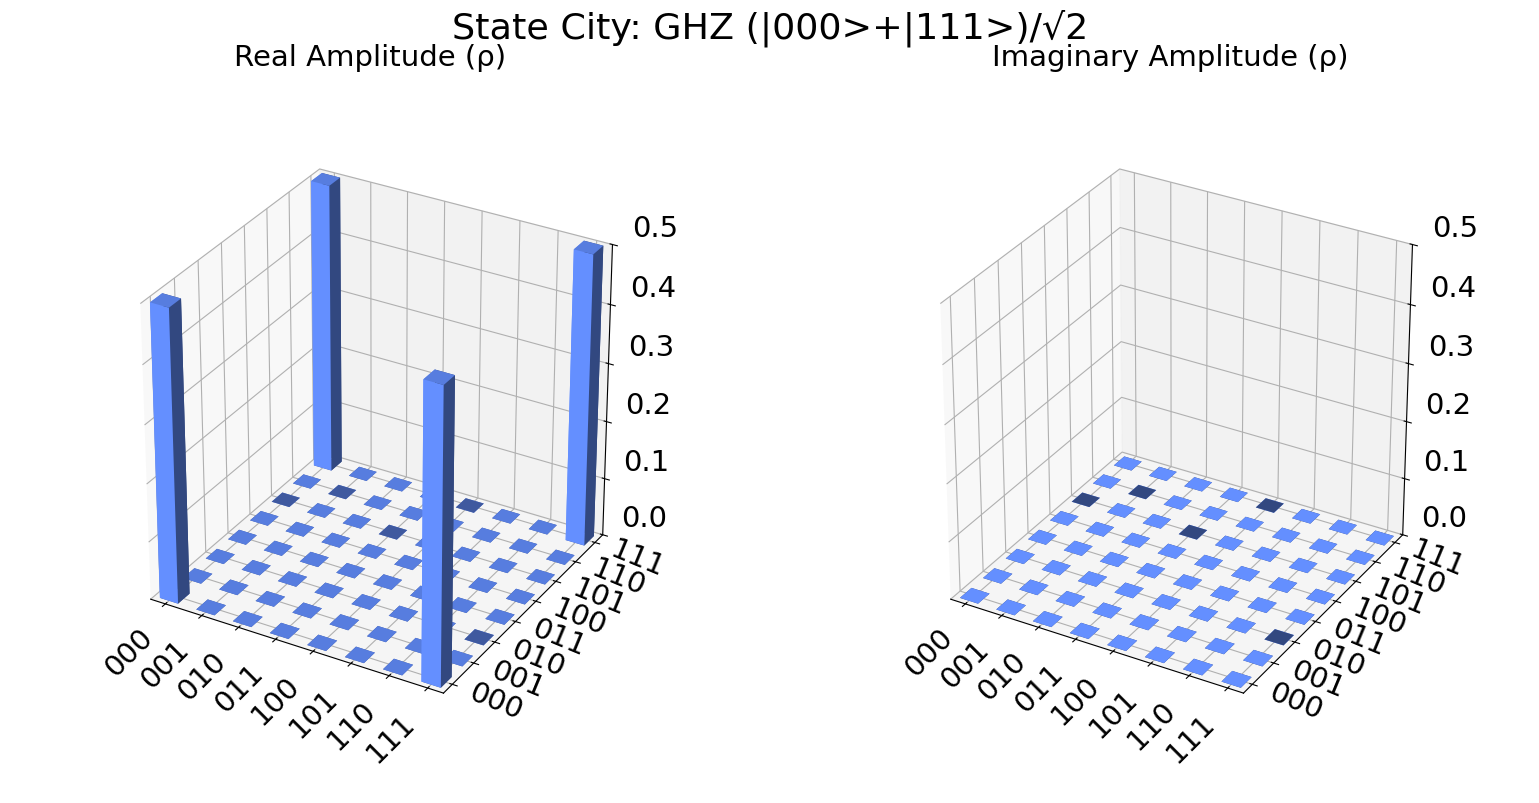

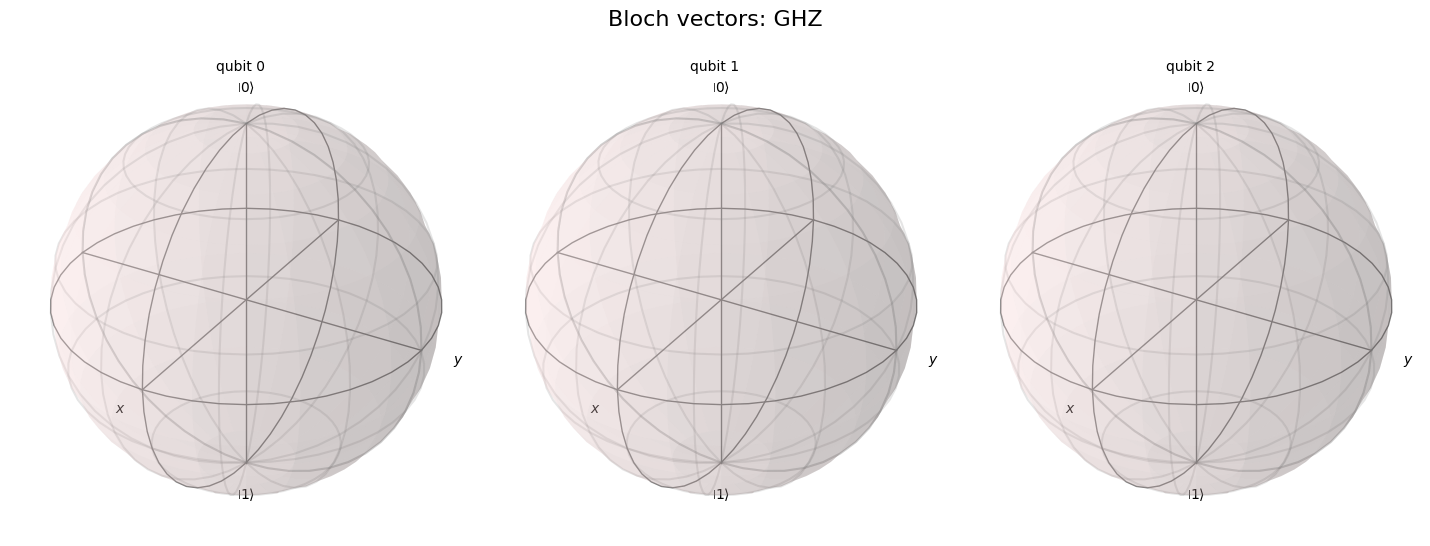

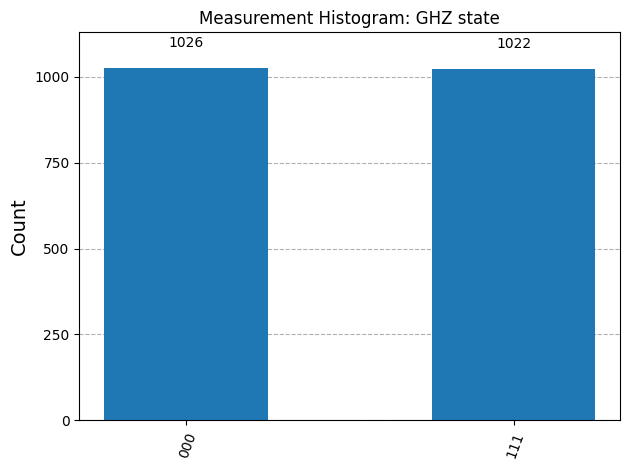

Counts: {'111': 1022, '000': 1026}

Analytical: outcomes |000> and |111> only, perfectly correlated.



In [ ]:
# Task 3: GHZ-like: H on q0 then CX(0,1) and CX(0,2)
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0,1,2], [0,1,2])

# Statevector before measurement
qc_ghz_state = QuantumCircuit(3)
qc_ghz_state.h(0)
qc_ghz_state.cx(0,1)
qc_ghz_state.cx(0,2)
sv_ghz = Statevector.from_instruction(qc_ghz_state)

print("--- GHZ state from H + CX + CX ---")
print("Statevector amplitudes (|000> .. |111>):")
print(np.round(sv_ghz.data, 6))

display(plot_state_city(sv_ghz, title="State City: GHZ (|000>+|111>)/√2"))
display(plot_bloch_multivector(sv_ghz, title="Bloch vectors: GHZ"))

# Simulation histogram
t_ghz = transpile(qc_ghz, sim)
res_ghz = sim.run(t_ghz, shots=2048).result()
counts_ghz = res_ghz.get_counts()
display(plot_histogram(counts_ghz, title="Measurement Histogram: GHZ state"))
print("Counts:", counts_ghz)
print("\nAnalytical: outcomes |000> and |111> only, perfectly correlated.\n")


--- H applied twice on |1> ---
Statevector (should equal |1> up to global phase): [0.+0.j 1.+0.j]


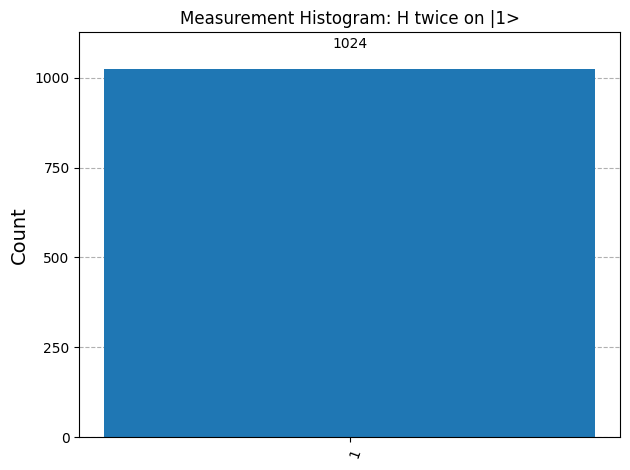

Counts (expected nearly all '1'): {'1': 1024}


In [ ]:
# Task 4: apply H twice on |1>
qc_h2 = QuantumCircuit(1, 1)
qc_h2.initialize([0,1], 0)  # start in |1>
qc_h2.h(0)
qc_h2.h(0)  # apply H twice
qc_h2.measure(0, 0)

# Statevector before measurement
qc_h2_state = QuantumCircuit(1)
qc_h2_state.initialize([0,1], 0)
qc_h2_state.h(0)
qc_h2_state.h(0)
sv_h2 = Statevector.from_instruction(qc_h2_state)

print("--- H applied twice on |1> ---")
print("Statevector (should equal |1> up to global phase):", np.round(sv_h2.data, 6))

# measurement simulation
t_h2 = transpile(qc_h2, sim)
res_h2 = sim.run(t_h2, shots=1024).result()
counts_h2 = res_h2.get_counts()
display(plot_histogram(counts_h2, title="Measurement Histogram: H twice on |1>"))
print("Counts (expected nearly all '1'):", counts_h2)


--- |0>: before and after H ---
Before H amplitudes: [1.+0.j 0.+0.j]
After  H amplitudes: [0.707107+0.j 0.707107+0.j]


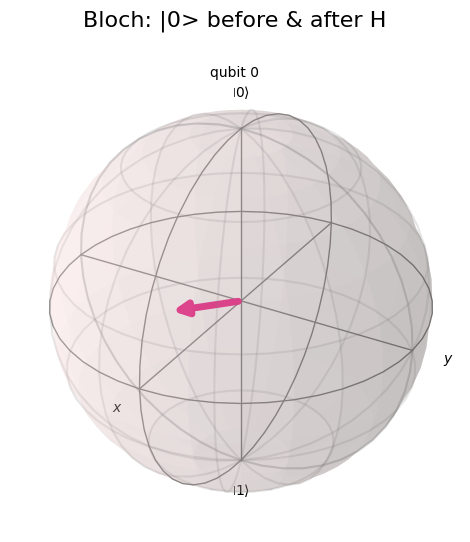

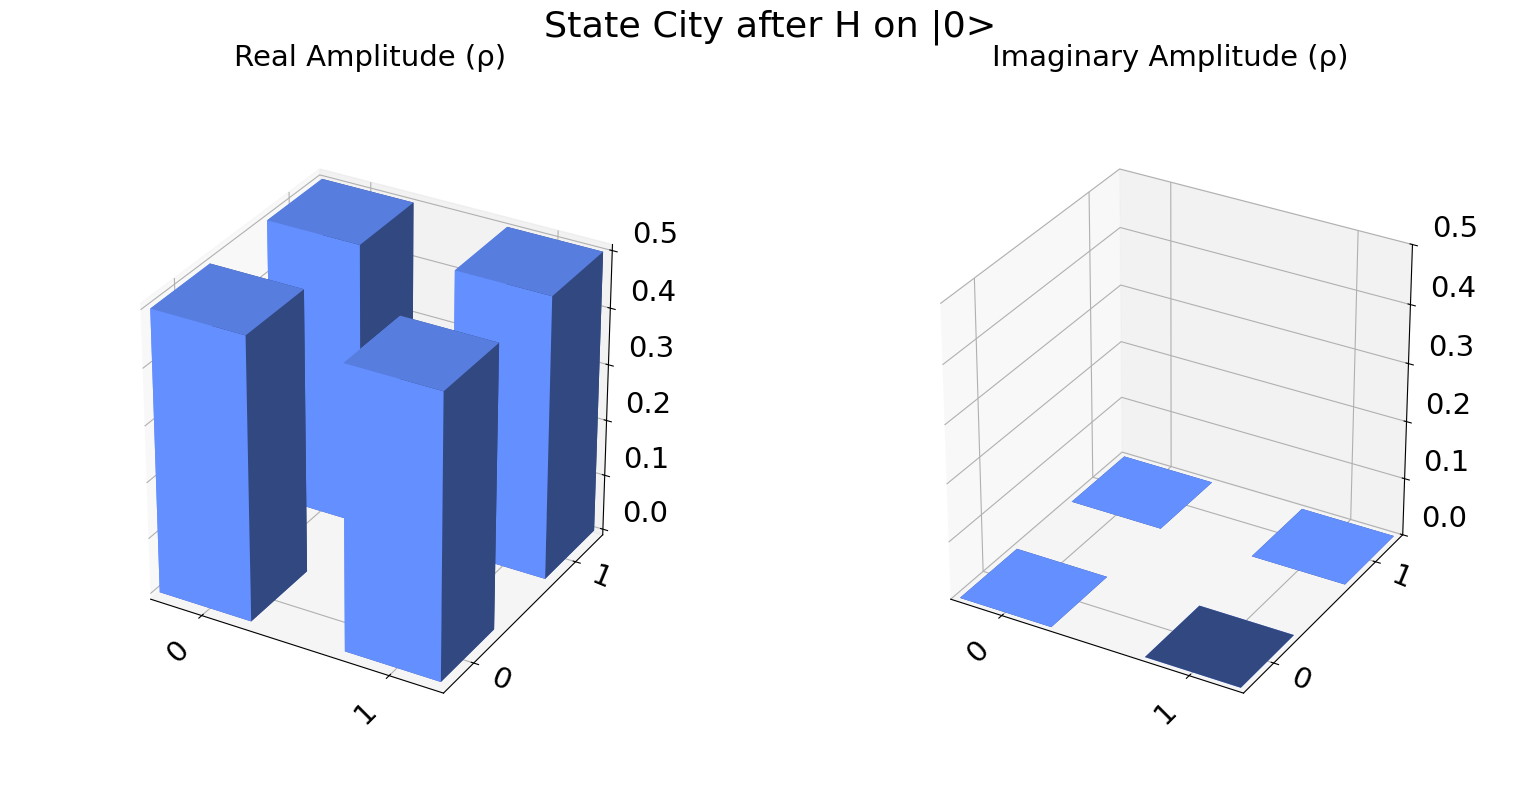

--- |1>: before and after H ---
Before H amplitudes: [0.+0.j 1.+0.j]
After  H amplitudes: [ 0.707107+0.j -0.707107+0.j]


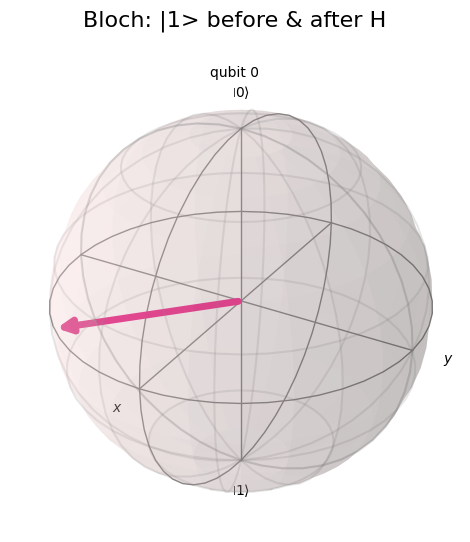

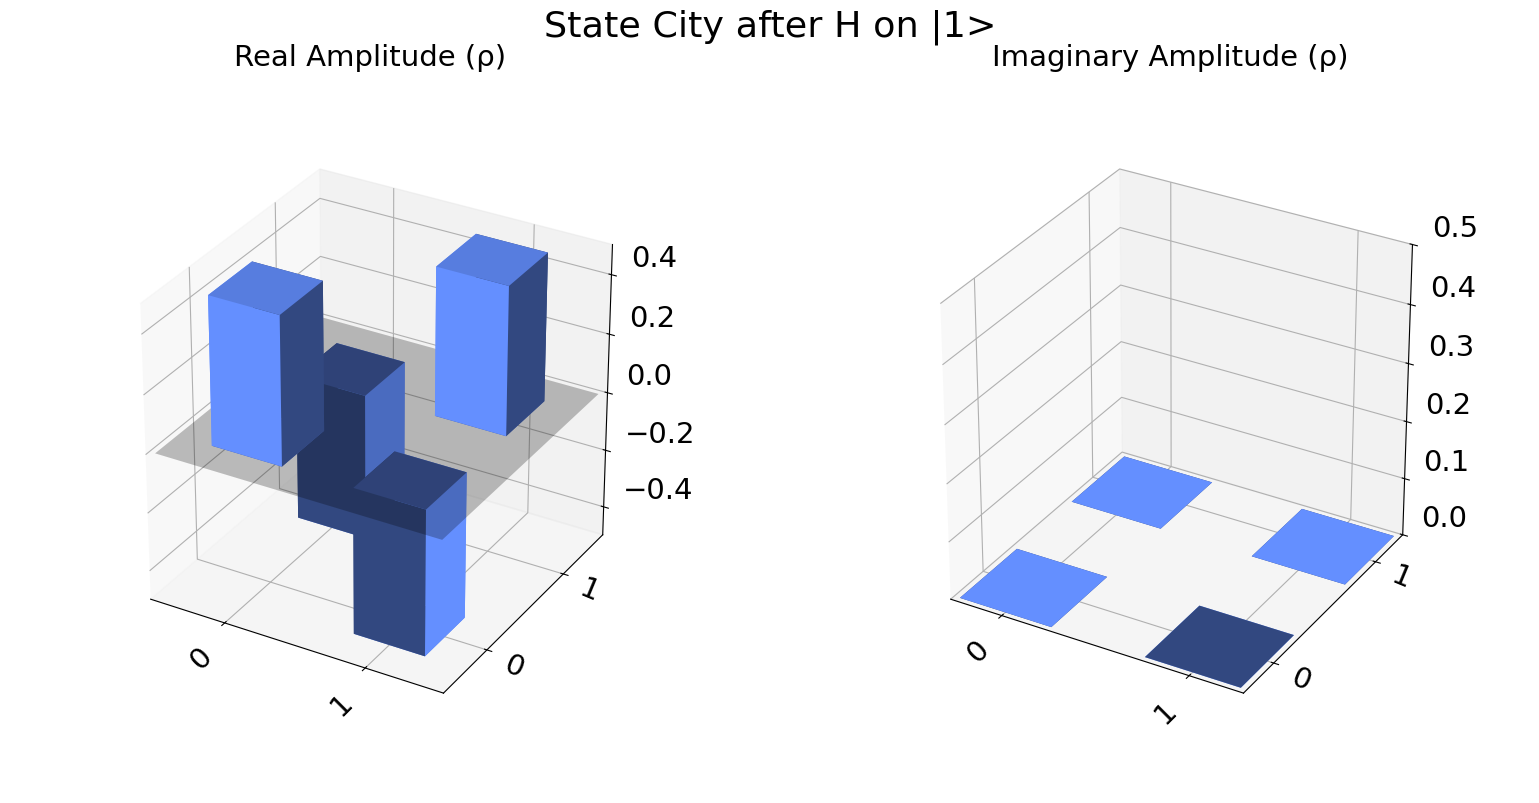

--- |+>: before and after H ---
Before H amplitudes: [0.707107+0.j 0.707107+0.j]
After  H amplitudes: [1.+0.j 0.+0.j]


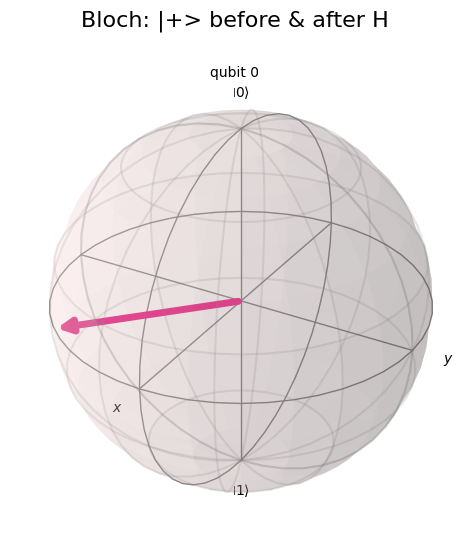

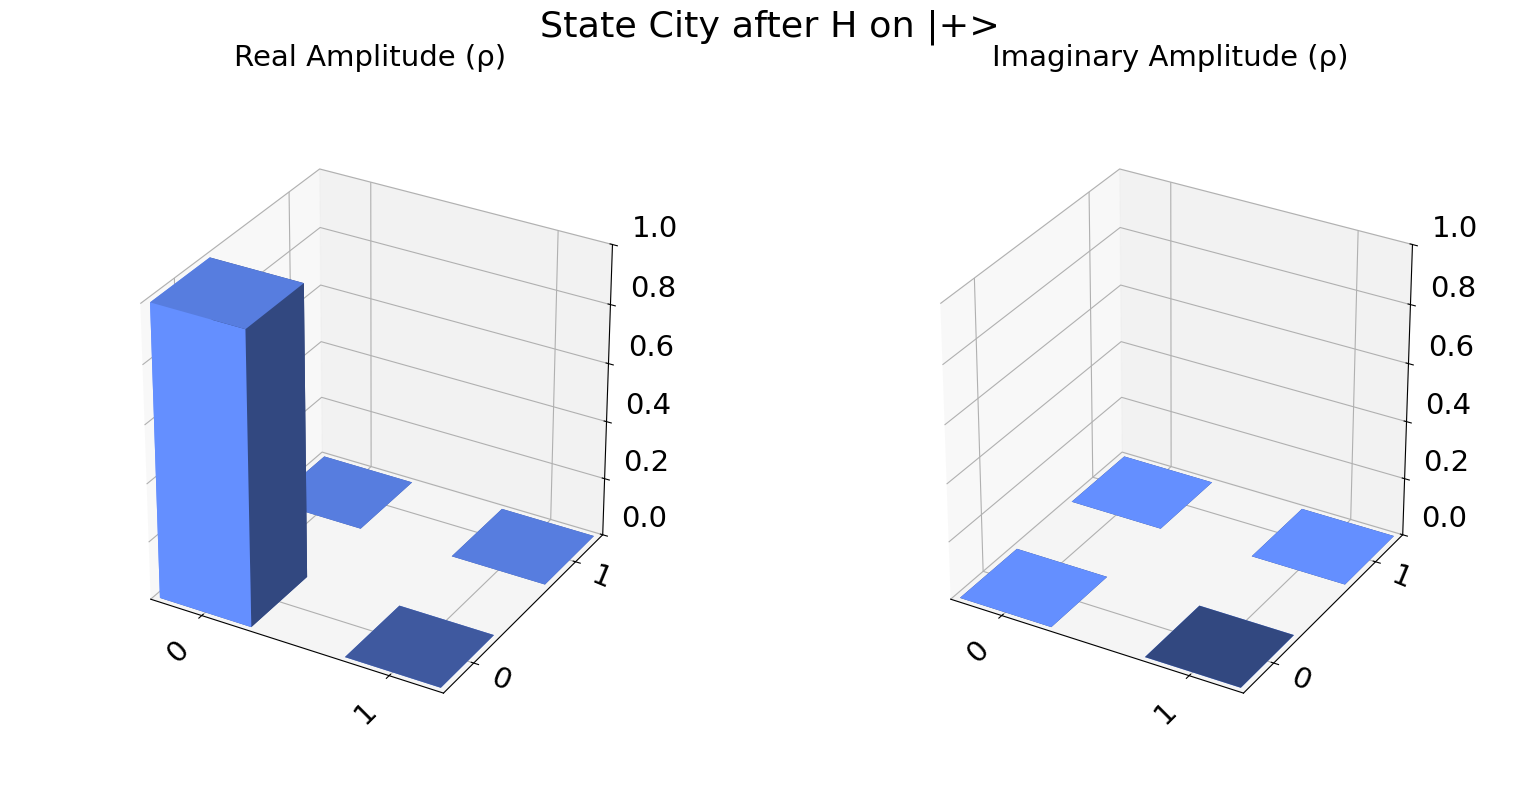

--- |->: before and after H ---
Before H amplitudes: [ 0.707107+0.j -0.707107+0.j]
After  H amplitudes: [0.+0.j 1.+0.j]


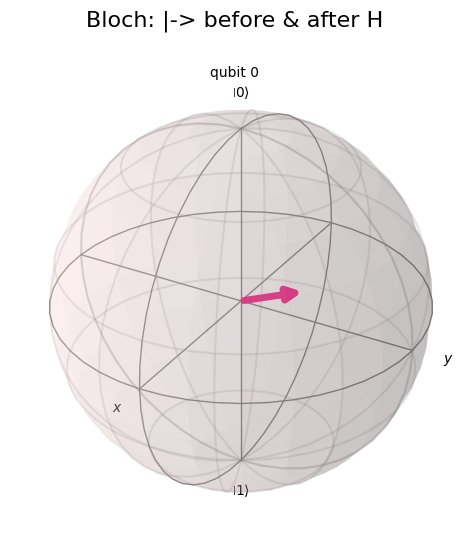

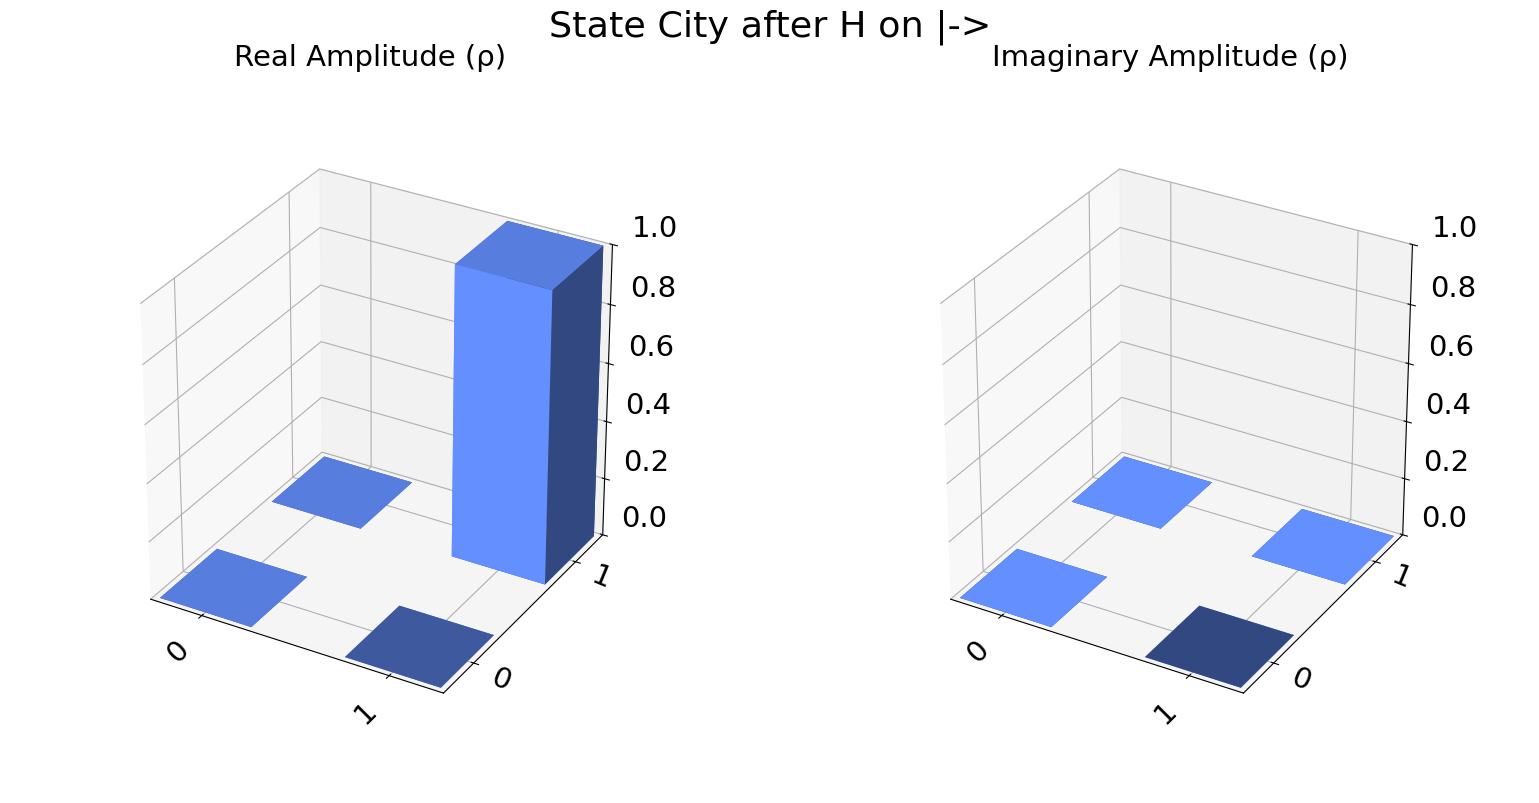

In [ ]:
# Task 5: Bloch sphere rotations for several states before and after H
def bloch_before_after(state_vec, label):
    # initial state Bloch
    sv_init = Statevector(state_vec)
    # after H
    qc_after = QuantumCircuit(1)
    qc_after.initialize(state_vec, 0)
    qc_after.h(0)
    sv_after = Statevector.from_instruction(qc_after)

    print(f"--- {label}: before and after H ---")
    print("Before H amplitudes:", np.round(sv_init.data, 6))
    print("After  H amplitudes:", np.round(sv_after.data, 6))

    display(plot_bloch_multivector([sv_init, sv_after], title=f"Bloch: {label} before & after H"))
    display(plot_state_city(sv_after, title=f"State City after H on {label}"))


# run for a set of states
for vec, lab in [(zero, "|0>"), (one, "|1>"), (plus, "|+>"), (minus, "|->")]:
    bloch_before_after(vec, lab)